# Import Libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load, Understand, and Visualize Data

In [23]:
# Load the diabetes dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Print the number of features and instances
print(f"Number of features: {df.shape[1]}")
print(f"Number of instances: {df.shape[0]}")

Number of features: 10
Number of instances: 442


# Add Target and Adjust Labels

In [24]:
# Add the target column to the dataset
df['target'] = data.target

# Adjust labels based on classification threshold
threshold = 140
df['target'] = df['target'].apply(lambda x: 1 if x >= threshold else 0)

# Print dataset shape and first few rows
print(f"Shape: {df.shape}")
print(df.head())

Shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646       1  
1 -0.039493 -0.068332 -0.092204       0  
2 -0.002592  0.002861 -0.025930       1  
3  0.034309  0.022688 -0.009362       1  
4 -0.002592 -0.031988 -0.046641       0  


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [27]:
# Check dữ liệu thiếu
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<Axes: >

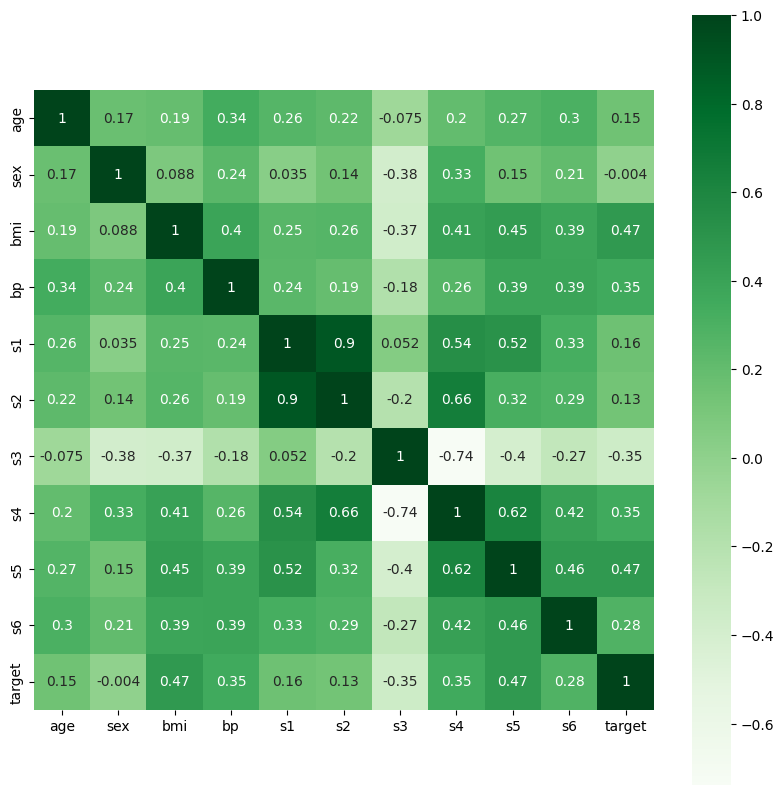

In [28]:
# Trực quan hóa dữ liệu
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, annot=True, annot_kws={"size":10}, cmap="Greens")

# Split Dataset into Train and Test Sets

In [29]:
# Split the dataset into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Standardization

In [30]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform here instead of fit_transform to avoid data leakage

# Print the first three rows of the standardized training data
print(X_train[:3])

[[ 6.42054387e-01  1.05661647e+00  6.19059528e-01  1.00486384e+00
  -8.68438531e-01 -9.32812513e-01 -1.44851520e+00  6.76301514e-01
   1.27560982e+00 -2.79646760e-04]
 [ 1.58492079e+00 -9.46417203e-01  1.71984406e+00  1.29221024e+00
   2.79081273e-01  2.51377585e-01  3.39206868e-01 -8.48887236e-02
   8.94884476e-02  1.72793733e+00]
 [-1.24367842e+00  1.05661647e+00 -2.79540092e-01  5.02007643e-01
   4.51209243e-01  8.14031444e-01 -8.26698830e-01  6.76301514e-01
   3.90205997e-01  1.12306139e+00]]


# Train Perceptron Model

In [31]:
ppn = Perceptron(eta0=1e-2, max_iter=6, random_state=42)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.01, max_iter=6, random_state=42)

# Define Evaluation Function

In [32]:
def evaluate_model(y_true, y_pred, dataset_name=""):
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {dataset_name} Dataset')
    plt.show()
    
    # Print accuracy and F1 score
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy Score for {dataset_name} Dataset: {acc}")
    print(f"F1 Score for {dataset_name} Dataset: {f1}")

# Model Evaluation on Training Set

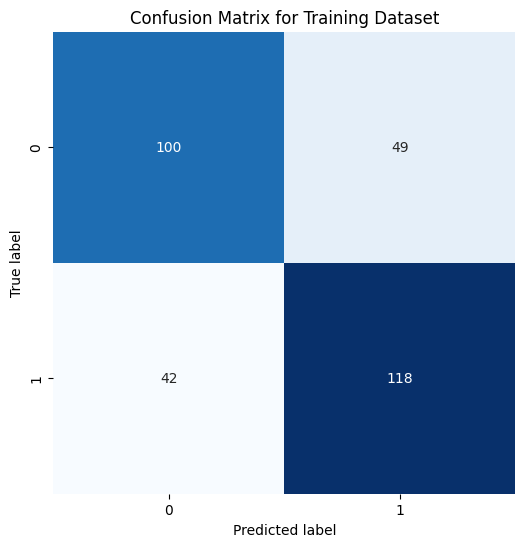

Accuracy Score for Training Dataset: 0.7055016181229773
F1 Score for Training Dataset: 0.7217125382262997


In [33]:
# Predict on the training set
y_pred_train = ppn.predict(X_train)

# Evaluate the model on the training set
evaluate_model(y_train, y_pred_train, dataset_name="Training")

# Model Evaluation on Test Set

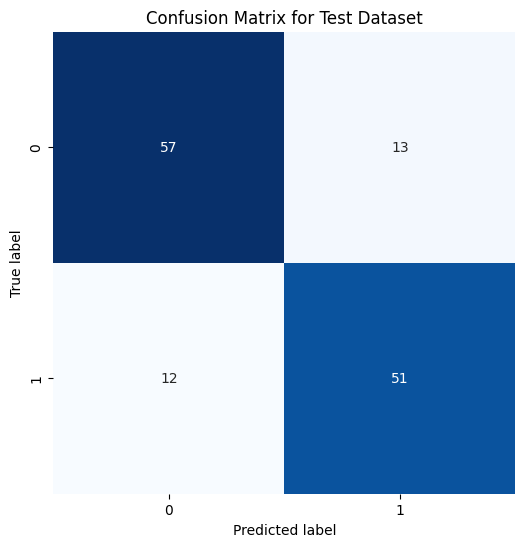

Accuracy Score for Test Dataset: 0.8120300751879699
F1 Score for Test Dataset: 0.8031496062992126


In [34]:
# Predict on the test set
y_pred_test = ppn.predict(X_test)

# Evaluate the model on the test set
evaluate_model(y_test, y_pred_test, dataset_name="Test")

In [35]:
# Create dictionary for labels
dict_labels = {0: "NO", 1: "YES"}

# Standardize and predict on a new data point
new_data_point = scaler.transform([[0.04, 0.07, 0.06, -0.02, -0.01, -0.03, -0.04, -0.07, -0.07, -0.02]])
predicted = ppn.predict(new_data_point)

# Print prediction result
print(f"Prediction for this person having diabetes: {dict_labels[predicted[0]]}")

Prediction for this person having diabetes: NO
